In [1]:
#import useful libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
from scipy import stats as sstats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
cmap = cm.jet
import math
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import cross_val_score
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
input_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/data/mean_representational_distance/distance_matrix_lda_zscored/'
figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/mean_representational_distance/lda_3/'
object_path =  os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/occupied_corners/'

In [3]:
mouse_vector = [56165, 32363, 32364, 32365, 411857, 411857, 401714]
conditions_vector = ['RANDOM', 'OVERLAPPING','STABLE']
sessions_random = [0,1,0,2,2,6,2] # total = 6
sessions_overlapping = [1,2,1,0,3,5,0] # total = 6
fixed_corner = [3,4,1,0,2,4,0]
sessions_stable = [2,0,2,0,1,4,1] # total = 5 (4 and 1/2)


In [65]:
random = []
overlapping = []
stable = []

random_dv = []
overlapping_dv = []
stable_dv = []

random_d = []
overlapping_d = []
stable_d = []

fixed_corner_data = []
occupied_corners_random = []
occupied_corners_stable = []
occupied_corners_overlapping = []
empty_corners_random = []
empty_corners_stable = []
empty_corners_overlapping = []

occupied_corners_overlapping_id = []

for i in [0,1,2,3,4,5,6]:
    mouse = mouse_vector[i]
    #### check session_random
    session = sessions_random[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_based_zscored_1.npy'
        file_name2 = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_based_zscored_2.npy'
        file_name1 = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.daily_zscored.npy'
        if os.path.isfile(file_name):
            distance = np.load(file_name)[0,:,:]
            random.append(distance)
            objects_position_file = object_path + 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
            occupied_corners_random.append(np.load(objects_position_file))
            empty_corners_random.append(np.load(objects_position_file))
        if os.path.isfile(file_name1):
            distance = np.load(file_name1)[0,:,:]
            random_d.append(distance)
        if os.path.isfile(file_name2):
            distance = np.load(file_name2)[0,:,:]
            random_dv.append(distance)

    session = sessions_overlapping[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_based_zscored_1.npy'
        file_name2 = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_based_zscored_2.npy'
        file_name1 = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.daily_zscored.npy'
        if os.path.isfile(file_name) and os.path.isfile(file_name1):
            distance = np.load(file_name)[0,:,:]
            fixed_corner_data.append(fixed_corner[i])
            overlapping.append(distance)
            objects_position_file = object_path + 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
            occupied_corners_overlapping.append(np.load(objects_position_file))
            empty_corners_overlapping.append(np.load(objects_position_file))
            occupied_corners_overlapping_id.append(np.load(objects_position_file))
        if os.path.isfile(file_name1):
            distance = np.load(file_name1)[0,:,:]
            overlapping_d.append(distance)
        if os.path.isfile(file_name2):
            distance = np.load(file_name2)[0,:,:]
            overlapping_dv.append(distance)
            
    session = sessions_stable[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_based_zscored_1.npy'
        file_name2 = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_based_zscored_2.npy'
        file_name1 = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.daily_zscored.npy'
        if os.path.isfile(file_name) and os.path.isfile(file_name1):
            distance = np.load(file_name)[0,:,:]
            stable.append(distance)
            objects_position_file = object_path + 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
            occupied_corners_stable.append(np.load(objects_position_file))
            empty_corners_stable.append(np.load(objects_position_file))
        if os.path.isfile(file_name1):
            distance = np.load(file_name1)[0,:,:]
            stable_d.append(distance)
        if os.path.isfile(file_name2):
            distance = np.load(file_name2)[0,:,:]
            stable_dv.append(distance)   
            
all_corners = [1,2,3,4]
index_corners_trial = np.zeros((4,2,20))
for corner in range(4):
    for day in range(4):
        for trial in range(5):
            i = day * 5 + trial
            if i < 19:
                index_corners_trial[corner,0,i] = int(day * 20 + trial * 4 + corner)
                index_corners_trial[corner,1,i] = int(day * 20 + (trial+1) * 4 + corner)      
index_corners_trial = index_corners_trial.astype(int)  

define_zero = [4,9,14,19]
for corner in range(4):
    index_corners_trial[corner][:,define_zero] = -1
    

In [5]:
def compute_zscore_distance(random):
    
    random_1 = []
    for i in range(len(random)):
        random_transf = []
        x = random[i][np.nonzero(random[i])]
        concat = np.concatenate((x,x))
        distance_zs = (random[i] - np.mean(concat))/np.std(concat)
        distance_zs[np.where(random[i] == 0)] = 0         
        random_1.append(np.array(distance_zs))
        
    return random_1
    
random = compute_zscore_distance(random)
random_dv = compute_zscore_distance(random_dv)
random_d = compute_zscore_distance(random_d)

stable = compute_zscore_distance(stable)
stable_d = compute_zscore_distance(stable_d)
stable_dv = compute_zscore_distance(stable_dv)

overlapping = compute_zscore_distance(overlapping)
overlapping_d = compute_zscore_distance(overlapping_d)
overlapping_dv = compute_zscore_distance(overlapping_dv)

all_corners = [1,2,3,4]

for i in range(len(occupied_corners_random)):
    for trial in range(20):
        non_intersection = list(set(all_corners) ^ set(occupied_corners_random[i][:,trial]))
        occupied_corners_random[i][0,trial] = (occupied_corners_random[i][0,trial] + trial * 4 -1).astype(int)
        occupied_corners_random[i][1,trial] = (occupied_corners_random[i][1,trial] + trial * 4 -1).astype(int)
        empty_corners_random[i][0,trial] = non_intersection[0] + trial * 4 -1
        empty_corners_random[i][1,trial] = non_intersection[1] + trial * 4 -1    
        
for i in range(len(occupied_corners_stable)): 
    for trial in range(20):
        non_intersection = list(set(all_corners) ^ set(occupied_corners_stable[i][:,trial]))
        occupied_corners_stable[i][0,trial] = (occupied_corners_stable[i][0,trial] + trial * 4 -1).astype(int)
        occupied_corners_stable[i][1,trial] = (occupied_corners_stable[i][1,trial] + trial * 4 -1).astype(int)

        empty_corners_stable[i][0,trial] = non_intersection[0] + trial * 4 -1
        empty_corners_stable[i][1,trial] = non_intersection[1] + trial * 4 -1

occupied_corners_overlapping_d = []

for i in range(len(occupied_corners_overlapping)):
    occupied_corners_overlapping_d_i = np.zeros((4,))
    for day in range(4):
        occupied_corners_overlapping_d_i[day] = fixed_corner_data[i] + day *8 -1
    occupied_corners_overlapping_d.append(occupied_corners_overlapping_d_i)
    for trial in range(20):
        non_intersection = list(set(all_corners) ^ set(occupied_corners_overlapping[i][:,trial]))
        empty_corners_overlapping[i][0,trial] = non_intersection[0] + trial * 4 -1
        empty_corners_overlapping[i][1,trial] = non_intersection[1] + trial * 4 -1
        
        occupied_corners_overlapping_id[i][0,trial] = fixed_corner_data[i] + trial *4 -1
        
        if (occupied_corners_overlapping[i][0,trial] - fixed_corner_data[i])==0:
            occupied_corners_overlapping_id[i][1,trial] = (occupied_corners_overlapping[i][1,trial] + trial * 4 -1).astype(int)
        else:
            occupied_corners_overlapping_id[i][1,trial] = (occupied_corners_overlapping[i][0,trial] + trial * 4 -1).astype(int)

        occupied_corners_overlapping[i][0,trial] = (occupied_corners_overlapping[i][0,trial] + trial * 4 -1).astype(int)
        occupied_corners_overlapping[i][1,trial] = (occupied_corners_overlapping[i][1,trial] + trial * 4 -1).astype(int)
        

In [6]:
def comparison_selection(distance_list,positions1,positions2, cross= False):
    evolution_list = []
    for i in range(len(distance_list)):
        if cross:
            evolution_list.append(distance_list[i][(positions1[i][0,:]).astype(int),positions2[i][0,:].astype(int)])
            evolution_list.append(distance_list[i][(positions1[i][0,:]).astype(int),positions2[i][1,:].astype(int)])
            evolution_list.append(distance_list[i][(positions1[i][1,:]).astype(int),positions2[i][0,:].astype(int)])
            evolution_list.append(distance_list[i][(positions1[i][1,:]).astype(int),positions2[i][1,:].astype(int)])
        else:
            evolution_list.append(distance_list[i][(positions1[i][0,:]).astype(int),positions2[i][1,:].astype(int)])
    return evolution_list

evolution_random_occupied = comparison_selection(random,occupied_corners_random,occupied_corners_random)
evolution_random_empty = comparison_selection(random,empty_corners_random,empty_corners_random)
evolution_random_cross = comparison_selection(random,occupied_corners_random,empty_corners_random,cross= True)

evolution_random_occupied_dv = comparison_selection(random_dv,occupied_corners_random,occupied_corners_random)
evolution_random_empty_dv = comparison_selection(random_dv,empty_corners_random,empty_corners_random)
evolution_random_cross_dv = comparison_selection(random_dv,occupied_corners_random,empty_corners_random,cross= True)


evolution_stable_occupied = comparison_selection(stable,occupied_corners_stable,occupied_corners_stable)
evolution_stable_empty = comparison_selection(stable,empty_corners_stable,empty_corners_stable)
evolution_stable_cross = comparison_selection(stable,occupied_corners_stable,empty_corners_stable, cross= True)

evolution_stable_occupied_dv = comparison_selection(stable_dv,occupied_corners_stable,occupied_corners_stable)
evolution_stable_empty_dv = comparison_selection(stable_dv,empty_corners_stable,empty_corners_stable)
evolution_stable_cross_dv = comparison_selection(stable_dv,occupied_corners_stable,empty_corners_stable, cross= True)


evolution_overlapping_occupied = comparison_selection(overlapping,occupied_corners_overlapping,occupied_corners_overlapping)
evolution_overlapping_empty = comparison_selection(overlapping,empty_corners_overlapping,empty_corners_overlapping)
evolution_overlapping_occupied_dv = comparison_selection(overlapping_dv,occupied_corners_overlapping,occupied_corners_overlapping)
evolution_overlapping_empty_dv = comparison_selection(overlapping_dv,empty_corners_overlapping,empty_corners_overlapping)


evolution_overlapping_cross_fix = []
evolution_overlapping_cross_mov = []   
for i in range(len(overlapping)):
    evolution_overlapping_cross_mov.append(overlapping[i][(occupied_corners_overlapping_id[i][1,:]).astype(int),empty_corners_overlapping[i][0,:].astype(int)])
    evolution_overlapping_cross_mov.append(overlapping[i][(occupied_corners_overlapping_id[i][1,:]).astype(int),empty_corners_overlapping[i][1,:].astype(int)])

    evolution_overlapping_cross_fix.append(overlapping[i][(occupied_corners_overlapping_id[i][0,:]).astype(int),empty_corners_overlapping[i][0,:].astype(int)])
    evolution_overlapping_cross_fix.append(overlapping[i][(occupied_corners_overlapping_id[i][0,:]).astype(int),empty_corners_overlapping[i][1,:].astype(int)])

evolution_overlapping_cross_fix_dv = []
evolution_overlapping_cross_mov_dv = []  
for i in range(len(overlapping)):
    evolution_overlapping_cross_mov_dv.append(overlapping_dv[i][(occupied_corners_overlapping_id[i][1,:]).astype(int),empty_corners_overlapping[i][0,:].astype(int)])
    evolution_overlapping_cross_mov_dv.append(overlapping_dv[i][(occupied_corners_overlapping_id[i][1,:]).astype(int),empty_corners_overlapping[i][1,:].astype(int)])

    evolution_overlapping_cross_fix_dv.append(overlapping_dv[i][(occupied_corners_overlapping_id[i][0,:]).astype(int),empty_corners_overlapping[i][0,:].astype(int)])
    evolution_overlapping_cross_fix_dv.append(overlapping_dv[i][(occupied_corners_overlapping_id[i][0,:]).astype(int),empty_corners_overlapping[i][1,:].astype(int)])


In [7]:
def evolution_corners(random_dv,index_corners_trial):

    evolution_random_cor1 = []
    for corner in range(4):
        index = np.arange(0,index_corners_trial[corner].shape[1])
        for i in range(len(random_dv)):
            evolution_random_cor1.append(random_dv[i][index_corners_trial[corner][0,index],index_corners_trial[corner][1,index]])        
    return evolution_random_cor1

evolution_random_corners = evolution_corners(random_dv,index_corners_trial)
evolution_overlapping_corners = evolution_corners(stable_dv,index_corners_trial)
evolution_stable_corners = evolution_corners(overlapping_dv,index_corners_trial)

In [8]:
def reshape_evolution(evolution):
    
    reshape_evolution_trial = np.zeros((len(evolution)*4,5))
    reshape_evolution_day = np.zeros((4,5*len(evolution)))

    for i in range(len(evolution)):
        r_evolution = evolution[i].reshape(4,5)
        reshape_evolution_trial[i*4:(i+1)*4,:] = r_evolution
        r_evolution = evolution[i].reshape(4,5)
        reshape_evolution_day[:,i*5:(i+1)*5] = r_evolution
     
    return [reshape_evolution_trial, reshape_evolution_day]

# def reshape_evolution(evolution):
    
#     reshape_evolution = []
    
#     for i in range(len(evolution)):
#         r_evolution = evolution[i].reshape(4,5).T
#         reshape_evolution.append(r_evolution)
#     return reshape_evolution

# def mean_evolution(evolution):
    
#     mean_trial_evolution = []
#     mean_day_evolution = []
 
#     for i in range(len(evolution)):
#         trial_mean = np.mean(evolution[i],axis = 1)
#         day_mean = np.mean(evolution[i],axis = 0)
#         mean_trial_evolution.append(trial_mean)
#         mean_day_evolution.append(day_mean)
        
# #     return [mean_trial_evolution, mean_day_evolution]
# [r_occ1, r_occ1_sem, r_occ2] = compute_mean_evolution(evolution_random_occupied)
# [r_emp1,r_emp2] = compute_mean_evolution(evolution_random_empty)
# [r_cross1,r_cross2] = compute_mean_evolution(evolution_random_cross)

# [s_occ1, s_occ2] = compute_mean_evolution(evolution_stable_occupied)
# [s_emp1,s_emp2] = compute_mean_evolution(evolution_stable_empty)
# [s_cross1,s_cross2] = compute_mean_evolution(evolution_stable_cross)

# [o_occ1, o_occ2] = compute_mean_evolution(evolution_overlapping_occupied)
# [o_emp1,o_emp2] = compute_mean_evolution(evolution_overlapping_empty)
# [o_cross_fix1,o_cross_fix2] = compute_mean_evolution(evolution_overlapping_cross_fix)
# [o_cross_mov1,o_cross_mov2] = compute_mean_evolution(evolution_overlapping_cross_mov)


# [r_occ1_dv, r_occ2_dv] = compute_mean_evolution(evolution_random_occupied_dv)
# [r_emp1_dv,r_emp2_dv] = compute_mean_evolution(evolution_random_empty_dv)
# [r_cross1_dv,r_cross2_dv] = compute_mean_evolution(evolution_random_cross_dv)

# [s_occ1_dv, s_occ2_dv] = compute_mean_evolution(evolution_stable_occupied_dv)
# [s_emp1_dv,s_emp2_dv] = compute_mean_evolution(evolution_stable_empty_dv)
# [s_cross1_dv,s_cross2_dv] = compute_mean_evolution(evolution_stable_cross_dv)

# [o_occ1_dv, o_occ2_dv] = compute_mean_evolution(evolution_overlapping_occupied_dv)
# [o_emp1_dv,o_emp2_dv] = compute_mean_evolution(evolution_overlapping_empty_dv)
# [o_cross_fix1_dv,o_cross_fix2_dv] = compute_mean_evolution(evolution_overlapping_cross_fix_dv)
# [o_cross_mov1_dv,o_cross_mov2_dv] = compute_mean_evolution(evolution_overlapping_cross_mov_dv)

# random_occ_mean = np.mean(r_occ1,axis = 0)
# random_empty_mean = np.mean(r_emp1,axis = 0)
# random_cross_mean = np.mean(r_cross1,axis = 0)

# random_occ_std = np.std(r_occ1,axis = 0)/np.sqrt(len(r_occ1))
# random_empty_std = np.std(r_emp1,axis = 0)/np.sqrt(len(r_occ1))
# random_cross_std = np.std(r_cross1,axis = 0)/np.sqrt(len(r_occ1))

# stable_occ_mean = np.mean(s_occ1,axis = 0)
# stable_empty_mean = np.mean(s_emp1,axis = 0)
# stable_cross_mean = np.mean(s_emp1,axis = 0)
# stable_occ_std = np.std(s_occ1,axis = 0)/np.sqrt(len(s_occ1))
# stable_empty_std = np.std(s_emp1,axis = 0)/np.sqrt(len(s_occ1))
# stable_cross_std = np.std(s_cross1,axis = 0)/np.sqrt(len(s_occ1))

# overlapping_occ_mean = np.mean(o_occ1,axis = 0)
# overlapping_empty_mean = np.mean(o_emp1,axis = 0)
# overlapping_cross_fix_mean = np.mean(o_cross_fix1,axis = 0)
# overlapping_cross_mov_mean = np.mean(o_cross_mov1,axis = 0)

# overlapping_occ_std = np.std(o_occ1,axis = 0)/np.sqrt(len(o_occ1))
# overlapping_empty_std = np.std(o_emp1,axis = 0)/np.sqrt(len(o_occ1))
# overlapping_cross_fix_std = np.std(o_cross_fix1,axis = 0)/np.sqrt(len(o_occ1))
# overlapping_cross_mov_std = np.std(o_cross_mov1,axis = 0)/np.sqrt(len(o_occ1))

# label = ['LDA 4 classes']
# titles = ['Objects','Empty Corners','Cross Distance']
# figure, axes = plt.subplots(1,3)
# trial_id = np.arange(1,6)
    
# axes[0].errorbar(trial_id,random_occ_mean,random_occ_std, color = 'b')
# axes[1].errorbar(trial_id,random_empty_mean,random_empty_std, color = 'b')
# axes[2].errorbar(trial_id,random_cross_mean,random_cross_std, color = 'b')

# axes[0].errorbar(trial_id,stable_occ_mean,stable_occ_std, color = 'r')
# axes[1].errorbar(trial_id,stable_empty_mean,stable_empty_std, color = 'r')
# axes[2].errorbar(trial_id,stable_cross_mean,stable_cross_std, color = 'r')

# axes[0].errorbar(trial_id,overlapping_occ_mean,overlapping_occ_std, color = 'g')
# axes[1].errorbar(trial_id,overlapping_empty_mean,overlapping_empty_std, color = 'g')
# axes[2].errorbar(trial_id,overlapping_cross_fix_mean,overlapping_cross_fix_std, color = 'y')
# axes[2].errorbar(trial_id,overlapping_cross_mov_mean,overlapping_cross_mov_std, color = 'cyan')

# # axes[0].fill_between(trial_id,random_occ_mean-random_occ_std,random_occ_mean+random_occ_std,alpha = 0.2, edgecolor = 'b', facecolor = 'b')
# # axes[1].fill_between(trial_id,random_empty_mean-random_empty_std,random_empty_mean+random_empty_std,alpha = 0.2, edgecolor = 'b', facecolor = 'b')
# # axes[2].fill_between(trial_id,random_cross_mean-random_cross_std,random_cross_mean+random_cross_std,alpha = 0.2, edgecolor = 'b', facecolor = 'b')

# # axes[0].fill_between(trial_id,stable_occ_mean-stable_occ_std,stable_occ_mean+stable_occ_std,alpha = 0.2, edgecolor = 'r', facecolor = 'r')
# # axes[1].fill_between(trial_id,stable_empty_mean-stable_empty_std,stable_empty_mean+stable_empty_std,alpha = 0.2, edgecolor = 'r', facecolor = 'r')
# # axes[2].fill_between(trial_id,stable_cross_mean-stable_cross_std,stable_cross_mean+stable_cross_std,alpha = 0.2, edgecolor = 'r', facecolor = 'r')

# # axes[0].fill_between(trial_id,overlapping_occ_mean-overlapping_occ_std,overlapping_occ_mean+overlapping_occ_std,alpha = 0.2, edgecolor = 'g', facecolor = 'g')
# # axes[1].fill_between(trial_id,overlapping_empty_mean-overlapping_empty_std,overlapping_empty_mean+overlapping_empty_std,alpha = 0.2, edgecolor = 'g', facecolor = 'g')
# # axes[2].fill_between(trial_id,overlapping_cross_fix_mean-overlapping_cross_fix_std,overlapping_cross_fix_mean+overlapping_cross_fix_std,alpha = 0.2, edgecolor = 'y', facecolor = 'y')
# # axes[2].fill_between(trial_id,overlapping_cross_mov_mean-overlapping_cross_mov_std,overlapping_cross_mov_mean+overlapping_cross_mov_std,alpha = 0.2, edgecolor = 'cyan', facecolor = 'cyan')

# trials_comparison_pos = [1,2,3,4,5]

# for j in range(3):
#     axes[j].set_xticks(trials_comparison_pos)
#     axes[j].set_ylim([-0.5,2.5])
#     axes[j].set_xlabel('Trial', fontsize = 12)
#     axes[j].set_ylabel('Z-Distance', fontsize = 12)
#     axes[j].set_title(titles[j],fontsize = 15)
        
# figure.set_size_inches([15,4])
# figure.patch.set_facecolor('white')

# figure.savefig(figure_path + 'lda_trials.png')

# figure = plt.figure()
# gs = plt.GridSpec(1,3)

# label_random = ['RANDOM_OBJ_OBJ','RANDOM_EMP_EMP','RANDOM_OBJ_EMP']
# label_stable = ['STABLE_OBJ_OBJ','STABLE_EMP_EMP','STABLE_OBJ_EMP']
# label_overlapping = ['OVERLAPPING_OBJ_OBJ','OVERLAPPING_EMP_EMP','OVERLAPPING_CROSS_FIX','OVERLAPPING_CROSS_MOV']

    
# plot_list = [[random_occ_mean],[random_empty_mean],[random_cross_mean]]
    
# ax1 = figure.add_subplot(gs[0,0])
# ax1.set_title('RANDOM',fontsize = 15)
# #ax1.set_xlabel('Conditions', fontsize = 15)
# ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
# ax1 = sns.violinplot(data = plot_list, orient = 'v')
# ax1.set_xticklabels(label_random)
# ax1.set_ylim([-0.5,2.5])
# for tick in ax1.get_xticklabels():
#     tick.set_rotation(30)
        
# plot_list = [[stable_occ_mean],[stable_empty_mean],[stable_cross_mean]]
                     
# ax1 = figure.add_subplot(gs[0,1])
# ax1.set_title('STABLE',fontsize = 15)
# ax1.set_xlabel('Conditions', fontsize = 15)
# ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
# ax1 = sns.violinplot(data = plot_list, orient = 'v')
# ax1.set_xticklabels(label_stable)
# ax1.set_ylim([-0.5,2.5])
# for tick in ax1.get_xticklabels():
#     tick.set_rotation(30)
        
# plot_list = [[overlapping_occ_mean],[overlapping_empty_mean],[overlapping_cross_fix_mean],[overlapping_cross_mov_mean]]
# ax1 = figure.add_subplot(gs[0,2])
# ax1.set_title('OVERLAPPING',fontsize = 15)
# ax1.set_xlabel('Conditions', fontsize = 15)
# ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
# ax1 = sns.violinplot(data = plot_list, orient = 'v')
# ax1.set_xticklabels(label_overlapping)
# ax1.set_ylim([-0.5,2.5])
# for tick in ax1.get_xticklabels():
#     tick.set_rotation(30)
        
# figure.set_size_inches([20,4])
# figure.patch.set_facecolor('white')

# figure.savefig(figure_path + 'lda_trials_violin2.png')

# random_occ_mean = np.mean(r_occ2,axis = 0)
# random_empty_mean = np.mean(r_emp2,axis = 0)
# random_cross_mean = np.mean(r_cross2,axis = 0)

# random_occ_std = np.std(r_occ2,axis = 0)/np.sqrt(len(r_occ1))
# random_empty_std = np.std(r_emp2,axis = 0)/np.sqrt(len(r_occ1))
# random_cross_std = np.std(r_cross2,axis = 0)/np.sqrt(len(r_occ1))

# stable_occ_mean = np.mean(s_occ2,axis = 0)
# stable_empty_mean = np.mean(s_emp2,axis = 0)
# stable_cross_mean = np.mean(s_emp2,axis = 0)
# stable_occ_std = np.std(s_occ2,axis = 0)/np.sqrt(len(s_occ1))
# stable_empty_std = np.std(s_emp2,axis = 0)/np.sqrt(len(s_occ1))
# stable_cross_std = np.std(s_cross2,axis = 0)/np.sqrt(len(s_occ1))

# overlapping_occ_mean = np.mean(o_occ2,axis = 0)
# overlapping_empty_mean = np.mean(o_emp2,axis = 0)
# overlapping_cross_fix_mean = np.mean(o_cross_fix2,axis = 0)
# overlapping_cross_mov_mean = np.mean(o_cross_mov2,axis = 0)

# overlapping_occ_std = np.std(o_occ2,axis = 0)/np.sqrt(len(o_occ1))
# overlapping_empty_std = np.std(o_emp2,axis = 0)/np.sqrt(len(o_occ1))
# overlapping_cross_fix_std = np.std(o_cross_fix2,axis = 0)/np.sqrt(len(o_occ1))
# overlapping_cross_mov_std = np.std(o_cross_mov2,axis = 0)/np.sqrt(len(o_occ1))

def compute_mean_evolution(evolution):
    
    [reshape_evo_trial, reshape_evo_day] = reshape_evolution(evolution)
    mean_trial = np.nanmean(reshape_evo_trial,axis =0)
    std_trial = np.nanmean(reshape_evo_trial,axis =0)/np.sqrt(reshape_evo_trial.shape[0])
    
    mean_day = np.nanmean(reshape_evo_day,axis =1)
    std_day = np.nanmean(reshape_evo_day,axis =1)/np.sqrt(reshape_evo_day.shape[1])

    return mean_trial, std_trial, mean_day, std_day

In [9]:
[matrix_r_occ1, matrix_r_occ2] =  reshape_evolution(evolution_random_occupied)
[matrix_r_emp1, matrix_r_emp2] = reshape_evolution(evolution_random_empty)
[matrix_r_cross1,matrix_r_cross2] = reshape_evolution(evolution_random_cross)

[matrix_s_occ1, matrix_s_occ2] =  reshape_evolution(evolution_stable_occupied)
[matrix_s_emp1, matrix_s_emp2] = reshape_evolution(evolution_stable_empty)
[matrix_s_cross1,matrix_s_cross2] = reshape_evolution(evolution_stable_cross)

[matrix_o_occ1, matrix_o_occ2] =  reshape_evolution(evolution_overlapping_occupied)
[matrix_o_emp1, matrix_o_emp2] = reshape_evolution(evolution_overlapping_empty)
[matrix_o_cross_fix1,matrix_o_cross_fix2] = reshape_evolution(evolution_overlapping_cross_fix)
[matrix_o_cross_mov1,matrix_o_cross_mov2] = reshape_evolution(evolution_overlapping_cross_mov)

[r_occ1, r_occ1_sem, r_occ2, r_occ2_sem] = compute_mean_evolution(evolution_random_occupied)
[r_emp1, r_emp1_sem, r_emp2, r_emp2_sem] = compute_mean_evolution(evolution_random_empty)
[r_cross1,r_cross1_sem,r_cross2,r_cross2_sem] = compute_mean_evolution(evolution_random_cross)

[s_occ1, s_occ1_sem, s_occ2, s_occ2_sem] = compute_mean_evolution(evolution_stable_occupied)
[s_emp1, s_emp1_sem, s_emp2, s_emp2_sem] = compute_mean_evolution(evolution_stable_empty)
[s_cross1,s_cross1_sem,s_cross2,s_cross2_sem] = compute_mean_evolution(evolution_stable_cross)

[o_occ1, o_occ1_sem, o_occ2, o_occ2_sem] = compute_mean_evolution(evolution_overlapping_occupied)
[o_emp1, o_emp1_sem, o_emp2, o_emp2_sem]= compute_mean_evolution(evolution_overlapping_empty)
[o_cross_fix1,o_cross_fix1_sem,o_cross_fix2,o_cross_fix2_sem] = compute_mean_evolution(evolution_overlapping_cross_fix)
[o_cross_mov1,o_cross_mov1_sem,o_cross_mov2,o_cross_mov2_sem] = compute_mean_evolution(evolution_overlapping_cross_mov)

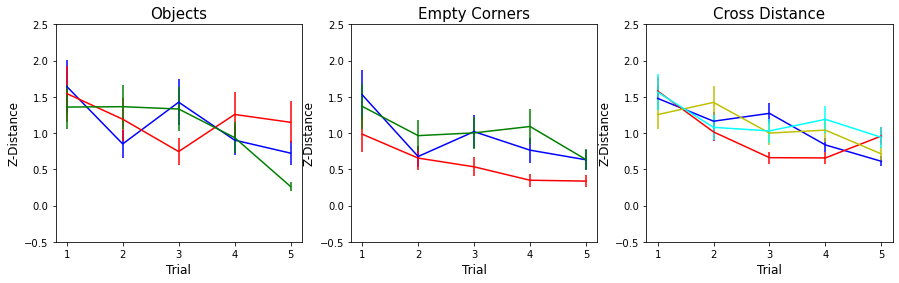

In [10]:
label = ['LDA 4 classes']
titles = ['Objects','Empty Corners','Cross Distance']
figure, axes = plt.subplots(1,3)
trial_id = np.arange(1,6)
    
axes[0].errorbar(trial_id,r_occ1,r_occ1_sem, color = 'b')
axes[1].errorbar(trial_id,r_emp1,r_emp1_sem, color = 'b')
axes[2].errorbar(trial_id,r_cross1,r_cross1_sem, color = 'b')

axes[0].errorbar(trial_id,s_occ1,s_occ1_sem, color = 'r')
axes[1].errorbar(trial_id,s_emp1,s_emp1_sem, color = 'r')
axes[2].errorbar(trial_id,s_cross1,s_cross1_sem, color = 'r')

axes[0].errorbar(trial_id,o_occ1,o_occ1_sem, color = 'g')
axes[1].errorbar(trial_id,o_emp1,o_emp1_sem, color = 'g')
axes[2].errorbar(trial_id,o_cross_fix1,o_cross_fix1_sem, color = 'y')
axes[2].errorbar(trial_id,o_cross_mov1,o_cross_mov1_sem, color = 'cyan')

# axes[0].fill_between(trial_id,random_occ_mean-random_occ_std,random_occ_mean+random_occ_std,alpha = 0.2, edgecolor = 'b', facecolor = 'b')
# axes[1].fill_between(trial_id,random_empty_mean-random_empty_std,random_empty_mean+random_empty_std,alpha = 0.2, edgecolor = 'b', facecolor = 'b')
# axes[2].fill_between(trial_id,random_cross_mean-random_cross_std,random_cross_mean+random_cross_std,alpha = 0.2, edgecolor = 'b', facecolor = 'b')

# axes[0].fill_between(trial_id,stable_occ_mean-stable_occ_std,stable_occ_mean+stable_occ_std,alpha = 0.2, edgecolor = 'r', facecolor = 'r')
# axes[1].fill_between(trial_id,stable_empty_mean-stable_empty_std,stable_empty_mean+stable_empty_std,alpha = 0.2, edgecolor = 'r', facecolor = 'r')
# axes[2].fill_between(trial_id,stable_cross_mean-stable_cross_std,stable_cross_mean+stable_cross_std,alpha = 0.2, edgecolor = 'r', facecolor = 'r')

# axes[0].fill_between(trial_id,overlapping_occ_mean-overlapping_occ_std,overlapping_occ_mean+overlapping_occ_std,alpha = 0.2, edgecolor = 'g', facecolor = 'g')
# axes[1].fill_between(trial_id,overlapping_empty_mean-overlapping_empty_std,overlapping_empty_mean+overlapping_empty_std,alpha = 0.2, edgecolor = 'g', facecolor = 'g')
# axes[2].fill_between(trial_id,overlapping_cross_fix_mean-overlapping_cross_fix_std,overlapping_cross_fix_mean+overlapping_cross_fix_std,alpha = 0.2, edgecolor = 'y', facecolor = 'y')
# axes[2].fill_between(trial_id,overlapping_cross_mov_mean-overlapping_cross_mov_std,overlapping_cross_mov_mean+overlapping_cross_mov_std,alpha = 0.2, edgecolor = 'cyan', facecolor = 'cyan')

trials_comparison_pos = [1,2,3,4,5]

for j in range(3):
    axes[j].set_xticks(trials_comparison_pos)
    axes[j].set_ylim([-0.5,2.5])
    axes[j].set_xlabel('Trial', fontsize = 12)
    axes[j].set_ylabel('Z-Distance', fontsize = 12)
    axes[j].set_title(titles[j],fontsize = 15)
        
figure.set_size_inches([15,4])
figure.patch.set_facecolor('white')

figure.savefig(figure_path + 'lda_trials.png')

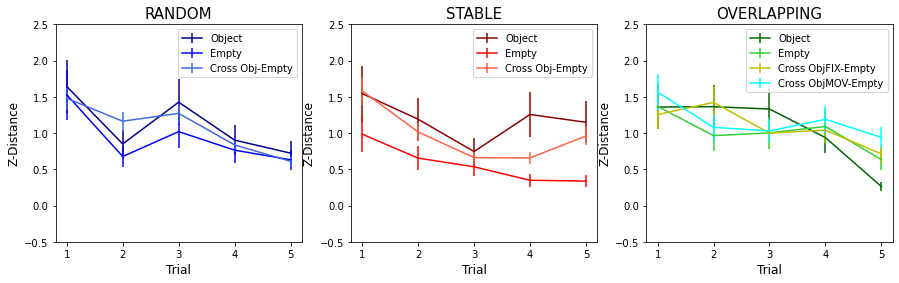

In [36]:
label = ['LDA 4 classes']
titles = ['RANDOM','STABLE','OVERLAPPING']
figure, axes = plt.subplots(1,3)
trial_id = np.arange(1,6)
    
axes[0].errorbar(trial_id,r_occ1,r_occ1_sem, color = 'darkblue')
axes[0].errorbar(trial_id,r_emp1,r_emp1_sem, color = 'blue')
axes[0].errorbar(trial_id,r_cross1,r_cross1_sem, color = 'royalblue')
axes[0].legend(['Object','Empty','Cross Obj-Empty'])

axes[1].errorbar(trial_id,s_occ1,s_occ1_sem, color = 'darkred')
axes[1].errorbar(trial_id,s_emp1,s_emp1_sem, color = 'red')
axes[1].errorbar(trial_id,s_cross1,s_cross1_sem, color = 'tomato')
axes[1].legend(['Object','Empty','Cross Obj-Empty'])

axes[2].errorbar(trial_id,o_occ1,o_occ1_sem, color = 'darkgreen')
axes[2].errorbar(trial_id,o_emp1,o_emp1_sem, color = 'limegreen')
axes[2].errorbar(trial_id,o_cross_fix1,o_cross_fix1_sem, color = 'y')
axes[2].errorbar(trial_id,o_cross_mov1,o_cross_mov1_sem, color = 'cyan')
axes[2].legend(['Object','Empty','Cross ObjFIX-Empty','Cross ObjMOV-Empty'])

trials_comparison_pos = [1,2,3,4,5]

for j in range(3):
    axes[j].set_xticks(trials_comparison_pos)
    axes[j].set_ylim([-0.5,2.5])
    axes[j].set_xlabel('Trial', fontsize = 12)
    axes[j].set_ylabel('Z-Distance', fontsize = 12)
    axes[j].set_title(titles[j],fontsize = 15)
        
figure.set_size_inches([15,4])
figure.patch.set_facecolor('white')

figure.savefig(figure_path + 'lda_trials2.png')

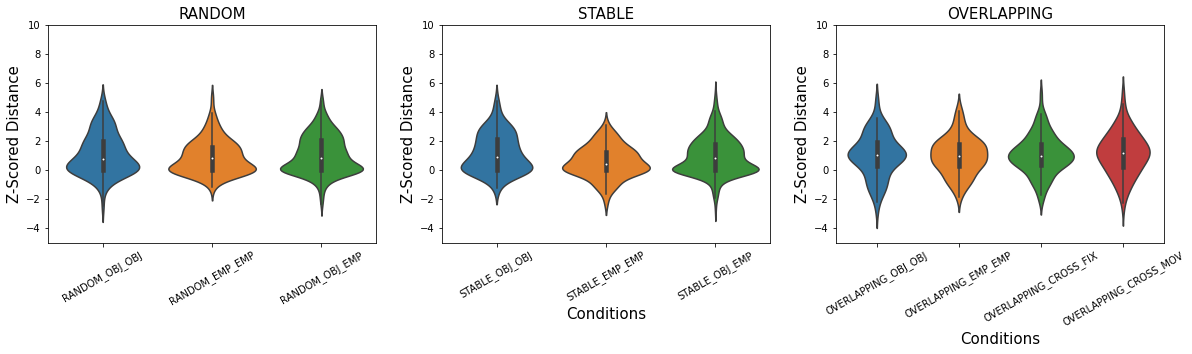

In [11]:
figure = plt.figure()
gs = plt.GridSpec(1,3)

label_random = ['RANDOM_OBJ_OBJ','RANDOM_EMP_EMP','RANDOM_OBJ_EMP']
label_stable = ['STABLE_OBJ_OBJ','STABLE_EMP_EMP','STABLE_OBJ_EMP']
label_overlapping = ['OVERLAPPING_OBJ_OBJ','OVERLAPPING_EMP_EMP','OVERLAPPING_CROSS_FIX','OVERLAPPING_CROSS_MOV']
   
plot_list = [[matrix_r_occ1],[matrix_r_emp1],[matrix_r_cross1]]
    
ax1 = figure.add_subplot(gs[0,0])
ax1.set_title('RANDOM',fontsize = 15)
#ax1.set_xlabel('Conditions', fontsize = 15)
ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
ax1 = sns.violinplot(data = plot_list, orient = 'v')
ax1.set_xticklabels(label_random)
ax1.set_ylim([-5,10])
for tick in ax1.get_xticklabels():
    tick.set_rotation(30)
        
plot_list = [[matrix_s_occ1],[matrix_s_emp1],[matrix_s_cross1]]
                     
ax1 = figure.add_subplot(gs[0,1])
ax1.set_title('STABLE',fontsize = 15)
ax1.set_xlabel('Conditions', fontsize = 15)
ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
ax1 = sns.violinplot(data = plot_list, orient = 'v')
ax1.set_xticklabels(label_stable)
ax1.set_ylim([-5,10])
for tick in ax1.get_xticklabels():
    tick.set_rotation(30)
        
plot_list = [[matrix_o_occ1],[matrix_o_emp1],[matrix_o_cross_fix1],[matrix_o_cross_mov1]]
ax1 = figure.add_subplot(gs[0,2])
ax1.set_title('OVERLAPPING',fontsize = 15)
ax1.set_xlabel('Conditions', fontsize = 15)
ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
ax1 = sns.violinplot(data = plot_list, orient = 'v')
ax1.set_xticklabels(label_overlapping)
ax1.set_ylim([-5,10])
for tick in ax1.get_xticklabels():
    tick.set_rotation(30)
        
figure.set_size_inches([20,4])
figure.patch.set_facecolor('white')

figure.savefig(figure_path + 'lda_trials_violin2.png')

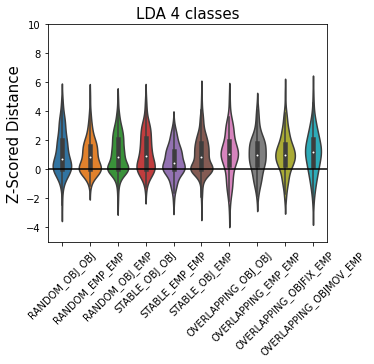

In [12]:
figure = plt.figure()
gs = plt.GridSpec(1,1)
label2 = ['RANDOM_OBJ_OBJ','RANDOM_EMP_EMP','RANDOM_OBJ_EMP','STABLE_OBJ_OBJ','STABLE_EMP_EMP','STABLE_OBJ_EMP','OVERLAPPING_OBJ_OBJ','OVERLAPPING_EMP_EMP','OVERLAPPING_OBJFIX_EMP','OVERLAPPING_OBJMOV_EMP']
label3 = ['RANDOM_OBJ_OBJ','RANDOM_EMP_EMP','RANDOM_OBJ_EMP','STABLE_OBJ_OBJ','STABLE_EMP_EMP','STABLE_OBJ_EMP','OVERLAPPING_OBJ_OBJ_MOV','OVERLAPPING_OBJ_OBJ_FIX','OVERLAPPING_EMP_EMP','OVERLAPPING_OBJMOV_EMP','OVERLAPPING_OBJFIX_EMP']

    
plot_list = [[matrix_r_occ1],[matrix_r_emp1],[matrix_r_cross1],[matrix_s_occ1],[matrix_s_emp1],[matrix_s_cross1],
             [matrix_o_occ1],[matrix_o_emp1],[matrix_o_cross_fix1],[matrix_o_cross_mov1]]
    
ax1 = figure.add_subplot(gs[0,0])
ax1.set_title('LDA 4 classes',fontsize = 15)
#ax1.set_xlabel('Conditions', fontsize = 15)
ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
ax1 = sns.violinplot(data = plot_list, orient = 'v')
ax1.set_xticklabels(label2)
ax1.set_xticklabels(label2)
ax1.set_ylim([-5,10])
ax1.axhline(y=0, color='k', linestyle='-')

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
        
figure.set_size_inches([5,4])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'lda_trials_violin.png')

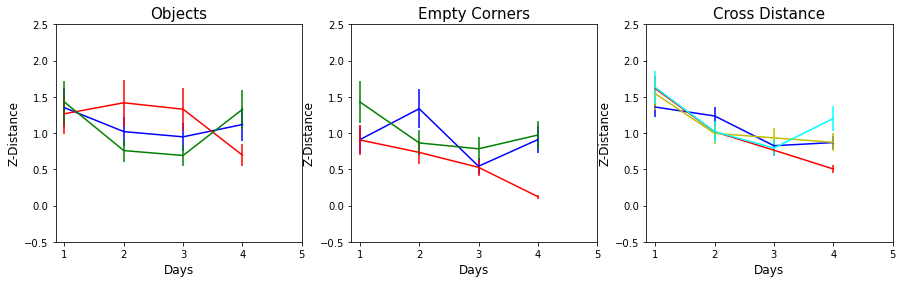

In [37]:
label = ['LDA 4 classes']
titles = ['Objects','Empty Corners','Cross Distance']
figure, axes = plt.subplots(1,3)
trial_id = np.arange(1,5)
    
axes[0].errorbar(trial_id,r_occ2,r_occ2_sem, color = 'b')
axes[1].errorbar(trial_id,r_emp2,r_emp2_sem, color = 'b')
axes[2].errorbar(trial_id,r_cross2,r_cross2_sem, color = 'b')

axes[0].errorbar(trial_id,s_occ2,s_occ2_sem, color = 'r')
axes[1].errorbar(trial_id,s_emp2,s_emp2_sem, color = 'r')
axes[2].errorbar(trial_id,s_cross2,s_cross2_sem, color = 'r')

axes[0].errorbar(trial_id,o_occ2,o_occ2_sem, color = 'g')
axes[1].errorbar(trial_id,o_emp2,o_emp2_sem, color = 'g')
axes[2].errorbar(trial_id,o_cross_fix2,o_cross_fix2_sem, color = 'y')
axes[2].errorbar(trial_id,o_cross_mov2,o_cross_mov2_sem, color = 'cyan')

trials_comparison_pos = [1,2,3,4,5]

for j in range(3):
    axes[j].set_xticks(trials_comparison_pos)
    axes[j].set_ylim([-0.5,2.5])
    axes[j].set_xlabel('Days', fontsize = 12)
    axes[j].set_ylabel('Z-Distance', fontsize = 12)
    axes[j].set_title(titles[j],fontsize = 15)
        
figure.set_size_inches([15,4])
figure.patch.set_facecolor('white')

figure.savefig(figure_path + 'lda_days.png')

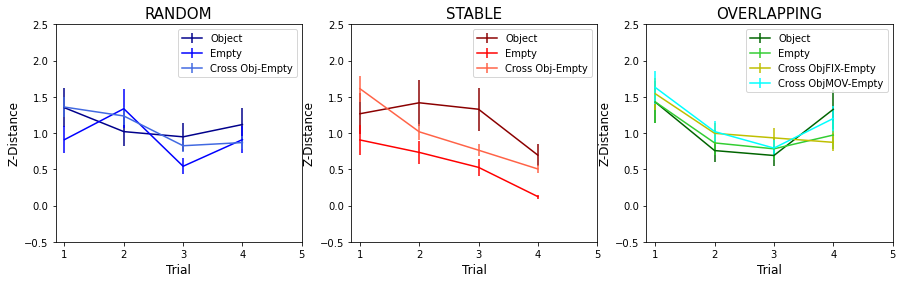

In [38]:
label = ['LDA 4 classes']
titles = ['RANDOM','STABLE','OVERLAPPING']
figure, axes = plt.subplots(1,3)
trial_id = np.arange(1,5)
    
axes[0].errorbar(trial_id,r_occ2,r_occ2_sem, color = 'darkblue')
axes[0].errorbar(trial_id,r_emp2,r_emp2_sem, color = 'blue')
axes[0].errorbar(trial_id,r_cross2,r_cross2_sem, color = 'royalblue')
axes[0].legend(['Object','Empty','Cross Obj-Empty'])

axes[1].errorbar(trial_id,s_occ2,s_occ2_sem, color = 'darkred')
axes[1].errorbar(trial_id,s_emp2,s_emp2_sem, color = 'red')
axes[1].errorbar(trial_id,s_cross2,s_cross2_sem, color = 'tomato')
axes[1].legend(['Object','Empty','Cross Obj-Empty'])

axes[2].errorbar(trial_id,o_occ2,o_occ2_sem, color = 'darkgreen')
axes[2].errorbar(trial_id,o_emp2,o_emp2_sem, color = 'limegreen')
axes[2].errorbar(trial_id,o_cross_fix2,o_cross_fix2_sem, color = 'y')
axes[2].errorbar(trial_id,o_cross_mov2,o_cross_mov2_sem, color = 'cyan')
axes[2].legend(['Object','Empty','Cross ObjFIX-Empty','Cross ObjMOV-Empty'])

trials_comparison_pos = [1,2,3,4,5]

for j in range(3):
    axes[j].set_xticks(trials_comparison_pos)
    axes[j].set_ylim([-0.5,2.5])
    axes[j].set_xlabel('Trial', fontsize = 12)
    axes[j].set_ylabel('Z-Distance', fontsize = 12)
    axes[j].set_title(titles[j],fontsize = 15)
        
figure.set_size_inches([15,4])
figure.patch.set_facecolor('white')

figure.savefig(figure_path + 'lda_days2.png')

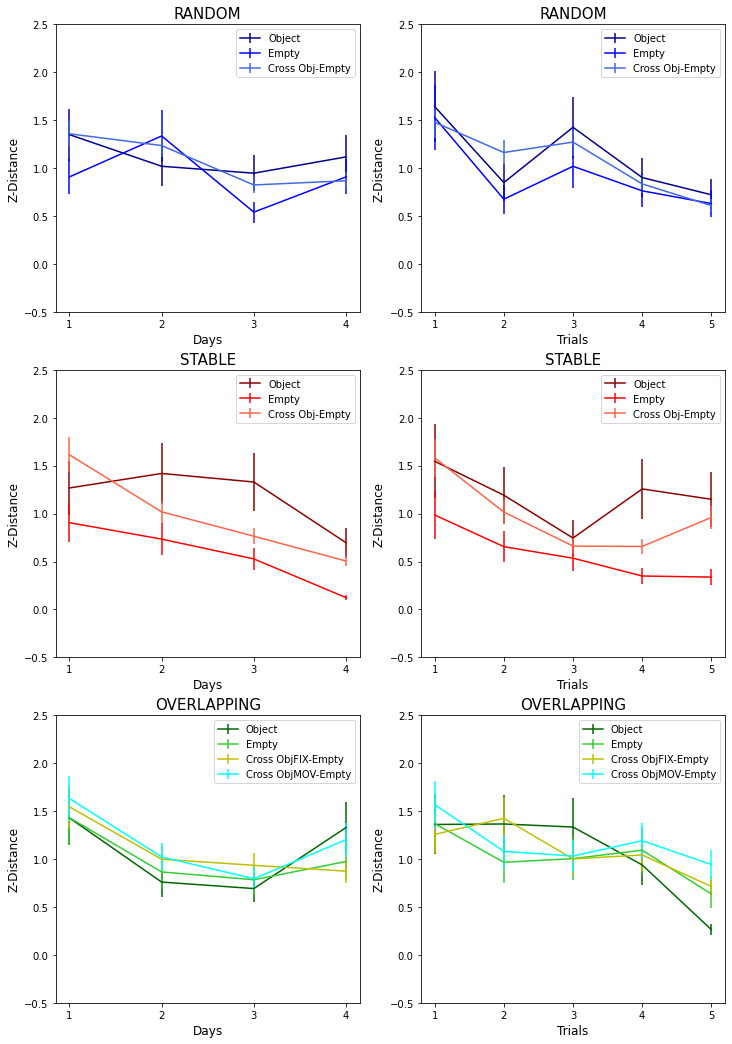

In [47]:
label = ['LDA 4 classes']
titles = ['RANDOM','STABLE','OVERLAPPING']
figure, axes = plt.subplots(3,2)
trial_id = np.arange(1,5)
    
axes[0,0].errorbar(trial_id,r_occ2,r_occ2_sem, color = 'darkblue')
axes[0,0].errorbar(trial_id,r_emp2,r_emp2_sem, color = 'blue')
axes[0,0].errorbar(trial_id,r_cross2,r_cross2_sem, color = 'royalblue')
axes[0,0].legend(['Object','Empty','Cross Obj-Empty'])

axes[1,0].errorbar(trial_id,s_occ2,s_occ2_sem, color = 'darkred')
axes[1,0].errorbar(trial_id,s_emp2,s_emp2_sem, color = 'red')
axes[1,0].errorbar(trial_id,s_cross2,s_cross2_sem, color = 'tomato')
axes[1,0].legend(['Object','Empty','Cross Obj-Empty'])

axes[2,0].errorbar(trial_id,o_occ2,o_occ2_sem, color = 'darkgreen')
axes[2,0].errorbar(trial_id,o_emp2,o_emp2_sem, color = 'limegreen')
axes[2,0].errorbar(trial_id,o_cross_fix2,o_cross_fix2_sem, color = 'y')
axes[2,0].errorbar(trial_id,o_cross_mov2,o_cross_mov2_sem, color = 'cyan')
axes[2,0].legend(['Object','Empty','Cross ObjFIX-Empty','Cross ObjMOV-Empty'])

trial_id = np.arange(1,6)

axes[0,1].errorbar(trial_id,r_occ1,r_occ1_sem, color = 'darkblue')
axes[0,1].errorbar(trial_id,r_emp1,r_emp1_sem, color = 'blue')
axes[0,1].errorbar(trial_id,r_cross1,r_cross1_sem, color = 'royalblue')
axes[0,1].legend(['Object','Empty','Cross Obj-Empty'])

axes[1,1].errorbar(trial_id,s_occ1,s_occ1_sem, color = 'darkred')
axes[1,1].errorbar(trial_id,s_emp1,s_emp1_sem, color = 'red')
axes[1,1].errorbar(trial_id,s_cross1,s_cross1_sem, color = 'tomato')
axes[1,1].legend(['Object','Empty','Cross Obj-Empty'])

axes[2,1].errorbar(trial_id,o_occ1,o_occ1_sem, color = 'darkgreen')
axes[2,1].errorbar(trial_id,o_emp1,o_emp1_sem, color = 'limegreen')
axes[2,1].errorbar(trial_id,o_cross_fix1,o_cross_fix1_sem, color = 'y')
axes[2,1].errorbar(trial_id,o_cross_mov1,o_cross_mov1_sem, color = 'cyan')
axes[2,1].legend(['Object','Empty','Cross ObjFIX-Empty','Cross ObjMOV-Empty'])


trials_comparison_pos = [1,2,3,4]
for j in range(3):
    axes[j,0].set_xticks(trials_comparison_pos)
    axes[j,0].set_ylim([-0.5,2.5])
    axes[j,0].set_xlabel('Days', fontsize = 12)
    axes[j,0].set_ylabel('Z-Distance', fontsize = 12)
    axes[j,0].set_title(titles[j],fontsize = 15)
    
trials_comparison_pos = [1,2,3,4,5]
for j in range(3):
    axes[j,1].set_xticks(trials_comparison_pos)
    axes[j,1].set_ylim([-0.5,2.5])
    axes[j,1].set_xlabel('Trials', fontsize = 12)
    axes[j,1].set_ylabel('Z-Distance', fontsize = 12)
    axes[j,1].set_title(titles[j],fontsize = 15)
             
figure.set_size_inches([12,18])
figure.patch.set_facecolor('white')

figure.savefig(figure_path + 'lda_trials_and_days.png')

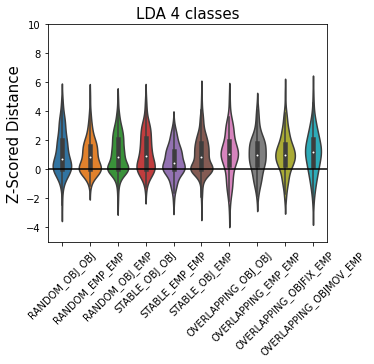

In [14]:
figure = plt.figure()
gs = plt.GridSpec(1,1)
label2 = ['RANDOM_OBJ_OBJ','RANDOM_EMP_EMP','RANDOM_OBJ_EMP','STABLE_OBJ_OBJ','STABLE_EMP_EMP','STABLE_OBJ_EMP','OVERLAPPING_OBJ_OBJ','OVERLAPPING_EMP_EMP','OVERLAPPING_OBJFIX_EMP','OVERLAPPING_OBJMOV_EMP']
label3 = ['RANDOM_OBJ_OBJ','RANDOM_EMP_EMP','RANDOM_OBJ_EMP','STABLE_OBJ_OBJ','STABLE_EMP_EMP','STABLE_OBJ_EMP','OVERLAPPING_OBJ_OBJ_MOV','OVERLAPPING_OBJ_OBJ_FIX','OVERLAPPING_EMP_EMP','OVERLAPPING_OBJMOV_EMP','OVERLAPPING_OBJFIX_EMP']

plot_list = [[matrix_r_occ2],[matrix_r_emp2],[matrix_r_cross2],[matrix_s_occ2],[matrix_s_emp2],[matrix_s_cross2],
             [matrix_o_occ2],[matrix_o_emp2],[matrix_o_cross_fix2],[matrix_o_cross_mov2]]
    
    
ax1 = figure.add_subplot(gs[0,0])
ax1.set_title('LDA 4 classes',fontsize = 15)
#ax1.set_xlabel('Conditions', fontsize = 15)
ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
ax1 = sns.violinplot(data = plot_list, orient = 'v')
ax1.set_xticklabels(label2)
ax1.set_xticklabels(label2)
ax1.set_ylim([-5,10])
ax1.axhline(y=0, color='k', linestyle='-')

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
        
figure.set_size_inches([5,4])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'lda_days_violin.png')

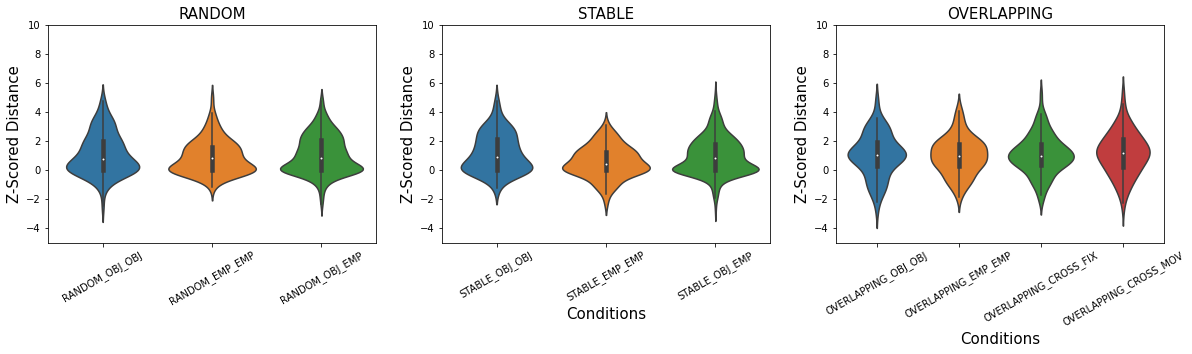

In [15]:
figure = plt.figure()
gs = plt.GridSpec(1,3)

label_random = ['RANDOM_OBJ_OBJ','RANDOM_EMP_EMP','RANDOM_OBJ_EMP']
label_stable = ['STABLE_OBJ_OBJ','STABLE_EMP_EMP','STABLE_OBJ_EMP']
label_overlapping = ['OVERLAPPING_OBJ_OBJ','OVERLAPPING_EMP_EMP','OVERLAPPING_CROSS_FIX','OVERLAPPING_CROSS_MOV']

    
plot_list = [[matrix_r_occ2],[matrix_r_emp2],[matrix_r_cross2]]
    
ax1 = figure.add_subplot(gs[0,0])
ax1.set_title('RANDOM',fontsize = 15)
#ax1.set_xlabel('Conditions', fontsize = 15)
ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
ax1 = sns.violinplot(data = plot_list, orient = 'v')
ax1.set_xticklabels(label_random)
ax1.set_ylim([-5,10])
for tick in ax1.get_xticklabels():
    tick.set_rotation(30)
        
plot_list = [[matrix_s_occ2],[matrix_s_emp2],[matrix_s_cross2]]
                     
ax1 = figure.add_subplot(gs[0,1])
ax1.set_title('STABLE',fontsize = 15)
ax1.set_xlabel('Conditions', fontsize = 15)
ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
ax1 = sns.violinplot(data = plot_list, orient = 'v')
ax1.set_xticklabels(label_stable)
ax1.set_ylim([-5,10])
for tick in ax1.get_xticklabels():
    tick.set_rotation(30)
        
plot_list = [[matrix_o_occ2],[matrix_o_emp2],[matrix_o_cross_fix2],[matrix_o_cross_mov2]]
ax1 = figure.add_subplot(gs[0,2])
ax1.set_title('OVERLAPPING',fontsize = 15)
ax1.set_xlabel('Conditions', fontsize = 15)
ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
ax1 = sns.violinplot(data = plot_list, orient = 'v')
ax1.set_xticklabels(label_overlapping)
ax1.set_ylim([-5,10])
for tick in ax1.get_xticklabels():
    tick.set_rotation(30)
        
figure.set_size_inches([20,4])
figure.patch.set_facecolor('white')

figure.savefig(figure_path + 'lda_days_violin2.png')


In [16]:
random_mean_occ = np.mean(evolution_random_occupied, axis = 0)
random_sem_occ =  np.std(evolution_random_occupied,axis = 0)/np.sqrt(len(evolution_random_occupied))
random_mean_emp = np.mean(evolution_random_empty, axis = 0)
random_sem_emp =  np.std(evolution_random_empty,axis = 0)/np.sqrt(len(evolution_random_empty))
random_mean_cross = np.mean(evolution_random_cross, axis = 0)
random_sem_cross =  np.std(evolution_random_cross,axis = 0)/np.sqrt(len(evolution_random_cross))

stable_mean_occ = np.mean(evolution_stable_occupied, axis = 0)
stable_sem_occ =  np.std(evolution_stable_occupied,axis = 0)/np.sqrt(len(evolution_stable_occupied))
stable_mean_emp = np.mean(evolution_stable_empty, axis = 0)
stable_sem_emp =  np.std(evolution_stable_empty,axis = 0)/np.sqrt(len(evolution_stable_empty))
stable_mean_cross = np.mean(evolution_stable_cross, axis = 0)
stable_sem_cross =  np.std(evolution_stable_cross,axis = 0)/np.sqrt(len(evolution_stable_cross))

overlapping_mean_occ = np.mean(evolution_overlapping_occupied, axis = 0)
overlapping_sem_occ =  np.std(evolution_overlapping_occupied,axis = 0)/np.sqrt(len(evolution_overlapping_occupied))
overlapping_mean_emp = np.mean(evolution_overlapping_empty, axis = 0)
overlapping_sem_emp =  np.std(evolution_overlapping_empty,axis = 0)/np.sqrt(len(evolution_overlapping_empty))
overlapping_mean_cross_fix = np.mean(evolution_overlapping_cross_fix, axis = 0)
overlapping_sem_cross_fix =  np.std(evolution_overlapping_cross_fix,axis = 0)/np.sqrt(len(evolution_overlapping_cross_fix))
overlapping_mean_cross_mov = np.mean(evolution_overlapping_cross_mov, axis = 0)
overlapping_sem_cross_mov =  np.std(evolution_overlapping_cross_mov,axis = 0)/np.sqrt(len(evolution_overlapping_cross_mov))


random_mean = np.mean(evolution_random_corners, axis = 0)
random_std =  np.std(evolution_random_corners,axis = 0)/np.sqrt(len(evolution_random_corners))

stable_mean = np.mean(evolution_stable_corners, axis = 0)
stable_std =  np.std(evolution_stable_corners,axis = 0)/np.sqrt(len(evolution_stable_corners))

overlapping_mean = np.mean(evolution_overlapping_corners, axis = 0)
overlapping_std =  np.std(evolution_overlapping_corners,axis = 0)/np.sqrt(len(evolution_overlapping_corners))

In [16]:
figure, axes = plt.subplots(4,1)
 
titles = ['Objects','Empty', 'Cross Obj-Emp','Cross-trial Corner']
trials_comparison = ['1-2','2-3','3-4','4-5','6-7','7-8','8-9','9-10','11-12','12-13','13-14','14-15','16-17','17-18','18-19','19-20']  
trials_comparison_pos = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18]

for day in range(4):
    time = np.arange(day * 5,day*5+4)
    axes[3].plot(time,random_mean[time],'b')
    axes[3].plot(time,stable_mean[time],'r')
    axes[3].plot(time,overlapping_mean[time],'g')

    axes[3].fill_between(time,stable_mean[time]-stable_std[time],stable_mean[time]+stable_std[time],alpha = 0.1, edgecolor = 'r', facecolor = 'r')
    axes[3].fill_between(time,random_mean[time]-random_std[time],random_mean[time]+random_std[time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')
    axes[3].fill_between(time,overlapping_mean[time]-overlapping_std[time],overlapping_mean[time]+overlapping_std[time],alpha = 0.1, edgecolor = 'g', facecolor = 'g')
        


time = np.arange(0,20)
axes[0].plot(time,random_mean_occ[time],'b')
axes[0].plot(time,stable_mean_occ[time],'r')
axes[0].plot(time,overlapping_mean_occ[time],'g')
axes[0].fill_between(time,stable_mean_occ[time]-stable_sem_occ[time],stable_mean_occ[time]+stable_sem_occ[time],alpha = 0.1, edgecolor = 'r', facecolor = 'r')
axes[0].fill_between(time,random_mean_occ[time]-random_sem_occ[time],random_mean_occ[time]+random_sem_occ[time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')
axes[0].fill_between(time,overlapping_mean_occ[time]-overlapping_sem_occ[time],overlapping_mean_occ[time]+overlapping_sem_occ[time],alpha = 0.1, edgecolor = 'g', facecolor = 'g')
        
axes[1].plot(time,random_mean_emp[time],'b')
axes[1].plot(time,stable_mean_emp[time],'r')
axes[1].plot(time,overlapping_mean_emp[time],'g')
axes[1].fill_between(time,stable_mean_emp[time]-stable_sem_emp[time],stable_mean_emp[time]+stable_sem_emp[time],alpha = 0.1, edgecolor = 'r', facecolor = 'r')
axes[1].fill_between(time,random_mean_emp[time]-random_sem_emp[time],random_mean_emp[time]+random_sem_emp[time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')
axes[1].fill_between(time,overlapping_mean_emp[time]-overlapping_sem_emp[time],overlapping_mean_emp[time]+overlapping_sem_emp[time],alpha = 0.1, edgecolor = 'g', facecolor = 'g')
        

axes[2].plot(time,random_mean_cross[time],'b')
axes[2].plot(time,stable_mean_cross[time],'r')
axes[2].plot(time,overlapping_mean_cross_fix[time],'y')
axes[2].plot(time,overlapping_mean_cross_mov[time],'cyan')
axes[2].fill_between(time,stable_mean_cross[time]-stable_sem_cross[time],stable_mean_cross[time]+stable_sem_cross[time],alpha = 0.1, edgecolor = 'r', facecolor = 'r')
axes[2].fill_between(time,random_mean_cross[time]-random_sem_cross[time],random_mean_cross[time]+random_sem_cross[time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')
axes[2].fill_between(time,overlapping_mean_cross_fix[time]-overlapping_sem_cross_fix[time],overlapping_mean_cross_fix[time]+overlapping_sem_cross_fix[time],alpha = 0.1, edgecolor = 'y', facecolor = 'y')
axes[2].fill_between(time,overlapping_mean_cross_mov[time]-overlapping_sem_cross_mov[time],overlapping_mean_cross_mov[time]+overlapping_sem_cross_mov[time],alpha = 0.1, edgecolor = 'cyan', facecolor = 'cyan')

    
for j in range(4):
    axes[j].set_ylim([-1,3])
    axes[j].set_ylabel('Normed Distance',fontsize = 12)
    axes[j].tick_params(axis='x', labelsize=12)
    axes[j].set_xticks(np.arange(0,21))

    axes[j].tick_params(axis='y', labelsize=12)  
    axes[j].set_xlabel('Trials ',fontsize = 12)
    for tick in axes[j].get_xticklabels():
        tick.set_rotation(45)
    axes[j].hlines(0,0,20,color = 'k')  
    axes[j].legend(['RANDOM','STABLE','OVERLAPPING'], fontsize = 12)
    axes[j].set_title(titles[j],fontsize = 20)

    
axes[3].set_xlabel('Trials comparison',fontsize = 12)
axes[3].set_xticks(trials_comparison_pos)
axes[3].set_xticklabels(trials_comparison, fontsize = 10)
axes[3].set_ylim([-1,0])
  
#figure.suptitle('Corners Representational Distance Evolution', fontsize = 25)
    
figure.set_size_inches([15,25])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'lda_trials_cross.png')

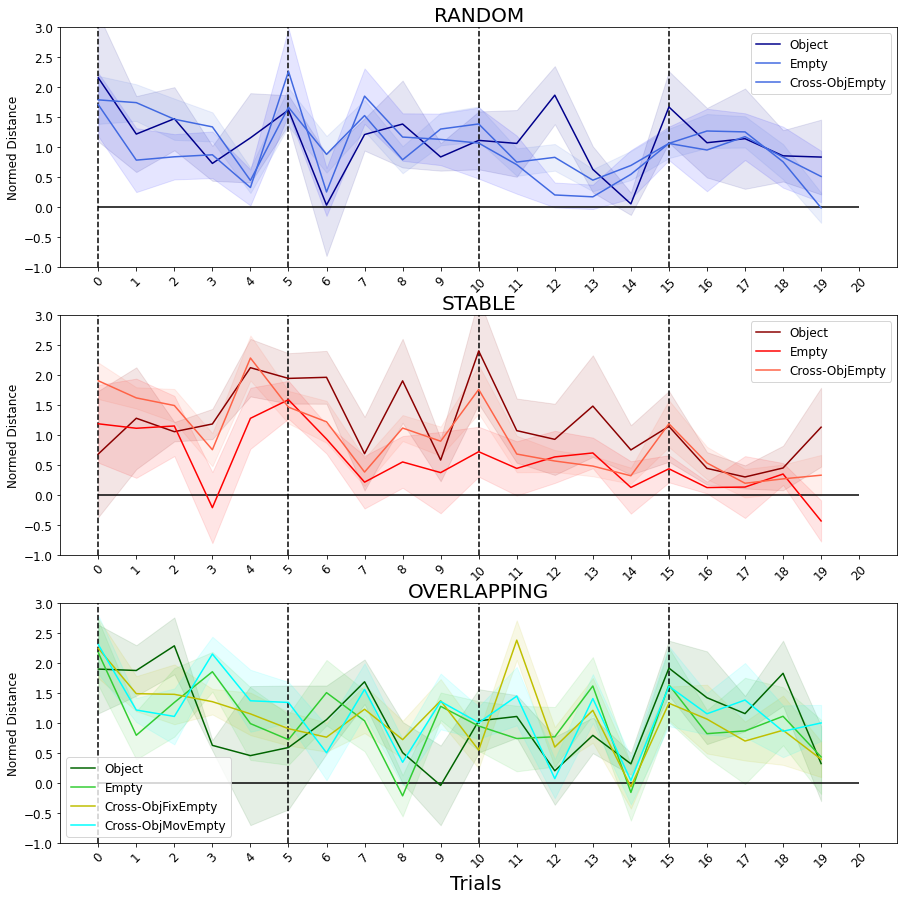

In [62]:
figure, axes = plt.subplots(3,1)
 
titles = ['RANDOM','STABLE','OVERLAPPING']

time = np.arange(0,20)
axes[0].plot(time,random_mean_occ[time],'darkblue')
axes[1].plot(time,stable_mean_occ[time],'darkred')
axes[2].plot(time,overlapping_mean_occ[time],'darkgreen')
axes[0].fill_between(time,random_mean_occ[time]-random_sem_occ[time],random_mean_occ[time]+random_sem_occ[time],alpha = 0.1, edgecolor = 'darkblue', facecolor = 'darkblue')
axes[1].fill_between(time,stable_mean_occ[time]-stable_sem_occ[time],stable_mean_occ[time]+stable_sem_occ[time],alpha = 0.1, edgecolor = 'darkred', facecolor = 'darkred')
axes[2].fill_between(time,overlapping_mean_occ[time]-overlapping_sem_occ[time],overlapping_mean_occ[time]+overlapping_sem_occ[time],alpha = 0.1, edgecolor = 'darkgreen', facecolor = 'darkgreen')
        
axes[0].plot(time,random_mean_emp[time],'royalblue')
axes[1].plot(time,stable_mean_emp[time],'red')
axes[2].plot(time,overlapping_mean_emp[time],'limegreen')
axes[0].fill_between(time,random_mean_emp[time]-random_sem_emp[time],random_mean_emp[time]+random_sem_emp[time],alpha = 0.1, edgecolor = 'blue', facecolor = 'blue')
axes[1].fill_between(time,stable_mean_emp[time]-stable_sem_emp[time],stable_mean_emp[time]+stable_sem_emp[time],alpha = 0.1, edgecolor = 'red', facecolor = 'red')
axes[2].fill_between(time,overlapping_mean_emp[time]-overlapping_sem_emp[time],overlapping_mean_emp[time]+overlapping_sem_emp[time],alpha = 0.1, edgecolor = 'limegreen', facecolor = 'limegreen')
        

axes[0].plot(time,random_mean_cross[time],'royalblue')
axes[1].plot(time,stable_mean_cross[time],'tomato')
axes[2].plot(time,overlapping_mean_cross_fix[time],'y')
axes[2].plot(time,overlapping_mean_cross_mov[time],'cyan')
axes[0].fill_between(time,random_mean_cross[time]-random_sem_cross[time],random_mean_cross[time]+random_sem_cross[time],alpha = 0.1, edgecolor = 'royalblue', facecolor = 'royalblue')
axes[1].fill_between(time,stable_mean_cross[time]-stable_sem_cross[time],stable_mean_cross[time]+stable_sem_cross[time],alpha = 0.1, edgecolor = 'tomato', facecolor = 'tomato')
axes[2].fill_between(time,overlapping_mean_cross_fix[time]-overlapping_sem_cross_fix[time],overlapping_mean_cross_fix[time]+overlapping_sem_cross_fix[time],alpha = 0.1, edgecolor = 'y', facecolor = 'y')
axes[2].fill_between(time,overlapping_mean_cross_mov[time]-overlapping_sem_cross_mov[time],overlapping_mean_cross_mov[time]+overlapping_sem_cross_mov[time],alpha = 0.1, edgecolor = 'cyan', facecolor = 'cyan')

    
for j in range(3):
    axes[j].set_ylim([-1,3])
    axes[j].set_ylabel('Normed Distance',fontsize = 12)
    axes[j].tick_params(axis='x', labelsize=12)
    axes[j].set_xticks(np.arange(0,21))

    axes[j].tick_params(axis='y', labelsize=12)  
    for tick in axes[j].get_xticklabels():
        tick.set_rotation(45)
    axes[j].hlines(0,0,20,color = 'k')  
    if j < 2:
        axes[j].legend(['Object','Empty','Cross-ObjEmpty'], fontsize = 12)
    axes[j].set_title(titles[j],fontsize = 20)
    axes[j].vlines([0,5,10,15], -1, 3, colors='k', linestyles='dashed')

axes[2].set_xlabel('Trials ',fontsize = 20)
axes[2].legend(['Object','Empty','Cross-ObjFixEmpty','Cross-ObjMovEmpty'], fontsize = 12)

figure.set_size_inches([15,15])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'lda_trials_cross2.png')

In [17]:
[matrix_r_occ1_dv, matrix_r_occ2_dv] =  reshape_evolution(evolution_random_corners)
[matrix_r_emp1_dv, matrix_r_emp2_dv] = reshape_evolution(evolution_stable_corners)
[matrix_r_cross1_dv,matrix_r_cross2_dv] = reshape_evolution(evolution_overlapping_corners)

[r_cor1_dv, r_cor1_sem_dv, r_cor2_dv, r_cor2_sem_dv] = compute_mean_evolution(evolution_random_corners)
[s_cor1_dv,s_cor1_sem_dv, s_cor2_dv, s_cor2_sem_dv] = compute_mean_evolution(evolution_stable_corners)
[o_cor1_dv,o_cor1_sem_dv, o_cor2_dv,o_cor2_sem_dv] = compute_mean_evolution(evolution_overlapping_corners)

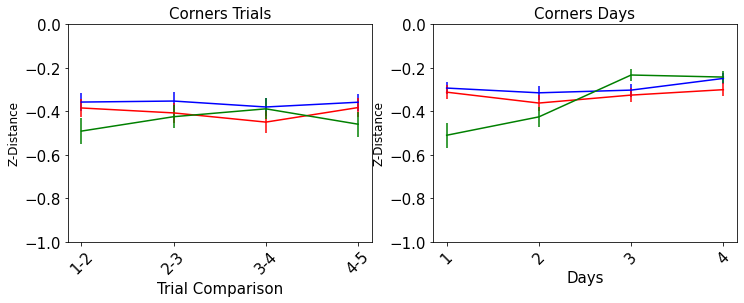

In [18]:

trials_comparison = ['1-2','2-3','3-4','4-5']  
trials_comparison_pos = [1,2,3,4]

titles = ['Objects','Empty Corners','Cross Distance']
figure, axes = plt.subplots(1,2)
trial_id = np.arange(1,5)
  
axes[0].errorbar(trial_id,r_cor1_dv[0:4],r_cor1_sem_dv[0:4], color = 'b')
axes[0].errorbar(trial_id,s_cor1_dv[0:4],s_cor1_sem_dv[0:4], color = 'r')
axes[0].errorbar(trial_id,o_cor1_dv[0:4],o_cor1_sem_dv[0:4], color = 'g')

axes[0].set_ylim([-1,0])
axes[0].set_xlabel('Trial Comparison', fontsize = 15)
axes[0].set_ylabel('Z-Distance', fontsize = 12)
axes[0].set_title('Corners Trials',fontsize = 15)
  
axes[1].errorbar(trial_id,r_cor2_dv[0:4],r_cor2_sem_dv[0:4], color = 'b')
axes[1].errorbar(trial_id,s_cor2_dv[0:4],s_cor2_sem_dv[0:4], color = 'r')
axes[1].errorbar(trial_id,o_cor2_dv[0:4],o_cor2_sem_dv[0:4], color = 'g')

axes[1].set_ylim([-1,0])
axes[1].set_xlabel('Days', fontsize = 15)
axes[1].set_ylabel('Z-Distance', fontsize = 12)
axes[1].set_title('Corners Days',fontsize = 15)       

axes[0].set_xticks(trials_comparison_pos)
axes[0].set_xticklabels(trials_comparison, fontsize = 10)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)    
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

axes[1].set_xticks(trials_comparison_pos)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)    
for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)
    
figure.set_size_inches([12,4])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'lda_trials_cross2.png')



In [19]:
occupied_corners_random_flag = []
for i in range(len(occupied_corners_random)):
    binary_array = np.zeros((4,20))
    for j in range(20):
        obj1 = occupied_corners_random[i][0,j].astype(int)%4
        obj2 = occupied_corners_random[i][1,j].astype(int)%4
        binary_array[obj1,j] = 1
        binary_array[obj2,j] = 1
    occupied_corners_random_flag.append(binary_array)
    
occupied_corners_stable_flag = []
for i in range(len(occupied_corners_stable)):
    binary_array = np.zeros((4,20))
    for j in range(20):
        obj1 = occupied_corners_stable[i][0,j].astype(int)%4
        obj2 = occupied_corners_stable[i][1,j].astype(int)%4
        binary_array[obj1,j] = 1
        binary_array[obj2,j] = 1
    occupied_corners_stable_flag.append(binary_array)

occupied_corners_overlapping_flag = []
occupied_corners_overlapping_mov_flag = []
occupied_corners_overlapping_fix_flag = []
for i in range(len(occupied_corners_overlapping)):
    binary_array_mov = np.zeros((4,20))
    binary_array0 = np.zeros((4,20))
    binary_array_fix = np.zeros((4,20))
    for j in range(20):
        obj0 = occupied_corners_overlapping_id[i][0,j].astype(int)%4
        obj1 = occupied_corners_overlapping_id[i][1,j].astype(int)%4
        
        #print(occupied_corners_overlapping_id[i][0,j]-occupied_corners_overlapping_id[i][1,j])
        binary_array0[obj0,j] = 1
        binary_array0[obj1,j] = 1
        
        binary_array_mov[obj1,j] = 1
        binary_array_fix[obj0,j] = 1
        
    occupied_corners_overlapping_flag.append(binary_array0)        
    occupied_corners_overlapping_mov_flag.append(binary_array_mov)
    occupied_corners_overlapping_fix_flag.append(binary_array_fix)    

In [20]:
evolution_random_nav = []
evolution_random_obj = []

evolution_stable_nav = []
evolution_stable_obj = []

evolution_overlapping_obj_fix = []
evolution_overlapping_obj_mov = []
evolution_overlapping_nav = []

for i in range(len(random)):
    obj_array = np.empty((20,))
    obj_array[:] = np.nan
    nav_array = np.empty((20,))
    nav_array[:] = np.nan
        
    for corner in range(4):
        diff = np.diff(occupied_corners_random_flag[i][corner,:],append = 0)
        consecutive_trials = np.logical_and(occupied_corners_random_flag[i][corner,:]==1,diff==0)
        index_obj = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
        index1 = index_corners_trial[corner][0,np.where(index_obj)[0]]
        index2 = index_corners_trial[corner][1,np.where(index_obj)[0]]
        obj_array[index_obj] = random_dv[i][index1,index2]
            
        consecutive_trials = np.logical_and(occupied_corners_random_flag[i][corner,:]==0,diff==0)
        index_nav = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
        index1 = index_corners_trial[corner][0,np.where(index_nav)[0]]
        index2 = index_corners_trial[corner][1,np.where(index_nav)[0]]
        nav_array[index_nav] =  random_dv[i][index1,index2]    
    evolution_random_obj.append(obj_array)
    evolution_random_nav.append(nav_array)
    
for i in range(len(stable)):        
    obj_array = np.empty((20,))
    obj_array[:] = np.nan
    nav_array = np.empty((20,))
    nav_array[:] = np.nan
    for corner in range(4):
        diff = np.diff(occupied_corners_stable_flag[i][corner,:],append = 0)
        consecutive_trials = np.logical_and(occupied_corners_stable_flag[i][corner,:]==1,diff==0)
        index_obj = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
        index1 = index_corners_trial[corner][0,np.where(index_obj)[0]]
        index2 = index_corners_trial[corner][1,np.where(index_obj)[0]]
        positions = np.where(index_obj==True)
        obj_array[positions] = stable_dv[i][index1,index2]
            
        consecutive_trials = np.logical_and(occupied_corners_stable_flag[i][corner,:]==0,diff==0)
        index_nav = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
        index1 = index_corners_trial[corner][0,np.where(index_nav)[0]]
        index2 = index_corners_trial[corner][1,np.where(index_nav)[0]]
        nav_array[index_nav] =  stable_dv[i][index1,index2]
    evolution_stable_obj.append(obj_array)
    evolution_stable_nav.append(nav_array)


for i in range(len(overlapping)):
        
    obj_array_mov = np.empty((20,))
    obj_array_mov[:] = np.nan
    obj_array_fix = np.empty((20,))
    obj_array_fix[:] = np.nan
    nav_array = np.empty((20,))
    nav_array[:] = np.nan
        
    for corner in range(4):
        diff = np.diff(occupied_corners_overlapping_mov_flag[i][corner,:],append = 0)
        consecutive_trials = np.logical_and(occupied_corners_overlapping_mov_flag[i][corner,:]==1,diff==0)
        #print(consecutive_trials)
        index_obj = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
        index1 = index_corners_trial[corner][0,np.where(index_obj)[0]]
        index2 = index_corners_trial[corner][1,np.where(index_obj)[0]]
        positions = np.where(index_obj==True)
        # print(i)
        # print(positions)
        obj_array_mov[positions] = overlapping_dv[i][index1,index2]
        
        diff = np.diff(occupied_corners_overlapping_fix_flag[i][corner,:],append = 0)
        consecutive_trials = np.logical_and(occupied_corners_overlapping_fix_flag[i][corner,:]==1,diff==0)
        index_obj = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
        index1 = index_corners_trial[corner][0,np.where(index_obj)[0]]
        index2 = index_corners_trial[corner][1,np.where(index_obj)[0]]
        positions = np.where(index_obj==True)
        obj_array_fix[positions] = overlapping_dv[i][index1,index2]
            
        diff = np.diff(occupied_corners_overlapping_flag[i][corner,:],append = 0)
        consecutive_trials = np.logical_and(occupied_corners_overlapping_flag[i][corner,:]==0,diff==0)
        index_nav = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
        index1 = index_corners_trial[corner][0,np.where(index_nav)[0]]
        index2 = index_corners_trial[corner][1,np.where(index_nav)[0]]
        nav_array[index_nav] =  overlapping_dv[i][index1,index2]
            
    evolution_overlapping_obj_mov.append(obj_array_mov)
    evolution_overlapping_obj_fix.append(obj_array_fix)
    evolution_overlapping_nav.append(nav_array)


In [21]:
[r_nav1, r_nav1_sem, r_nav2, r_nav2_sem] = compute_mean_evolution(evolution_random_nav)
[r_obj1, r_obj1_sem, r_obj2, r_obj2_sem] = compute_mean_evolution(evolution_random_obj)

[s_nav1, s_nav1_sem, s_nav2, s_nav2_sem] = compute_mean_evolution(evolution_stable_nav)
[s_obj1, s_obj1_sem, s_obj2, s_obj2_sem] = compute_mean_evolution(evolution_stable_obj)


[o_nav1, o_nav1_sem, o_nav2, o_nav2_sem] = compute_mean_evolution(evolution_overlapping_nav)
[o_obj_fix1, o_obj_fix1_sem, o_obj_fix2, o_obj_fix2_sem] = compute_mean_evolution(evolution_overlapping_obj_fix)
[o_obj_mov1, o_obj_mov1_sem, o_obj_mov2, o_obj_mov2_sem] = compute_mean_evolution(evolution_overlapping_obj_mov)


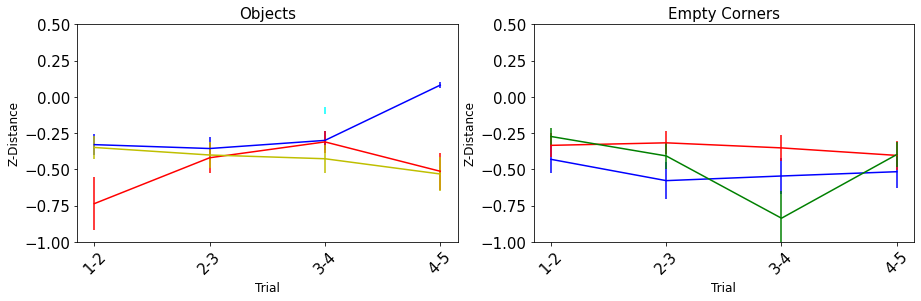

In [22]:
label = ['LDA 4 classes']
titles = ['Objects','Empty Corners']
figure, axes = plt.subplots(1,2)
trial_id = np.arange(1,6)
    
axes[0].errorbar(trial_id,r_obj1,r_obj1_sem, color = 'b')
axes[1].errorbar(trial_id,r_nav1,r_nav1_sem, color = 'b')

axes[0].errorbar(trial_id,s_obj1,s_obj1_sem, color = 'r')
axes[1].errorbar(trial_id,s_nav1,s_nav1_sem, color = 'r')

axes[0].errorbar(trial_id,o_obj_fix1,o_obj_fix1_sem, color = 'y')
axes[0].errorbar(trial_id,o_obj_mov1,o_obj_mov1_sem, color = 'cyan')
axes[1].errorbar(trial_id,o_nav1,o_nav1_sem, color = 'g')


trials_comparison = ['1-2','2-3','3-4','4-5']  
trials_comparison_pos = [1,2,3,4]

for j in range(2):
    axes[j].set_xticks(trials_comparison_pos)
    axes[j].set_ylim([-1,0.5])
    axes[j].set_xlabel('Trial', fontsize = 12)
    axes[j].set_ylabel('Z-Distance', fontsize = 12)
    axes[j].set_title(titles[j],fontsize = 15)


    axes[j].set_xticklabels(trials_comparison, fontsize = 10)
    axes[j].tick_params(axis='x', labelsize=15)
    axes[j].tick_params(axis='y', labelsize=15)    
    for tick in axes[j].get_xticklabels():
        tick.set_rotation(45)
        
figure.set_size_inches([15,4])
figure.patch.set_facecolor('white')

figure.savefig(figure_path + 'lda_cross_trial_obj_empty_trials.png')

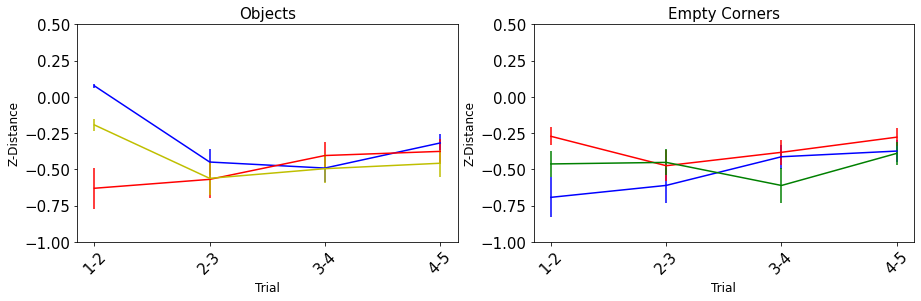

In [23]:
label = ['LDA 4 classes']
titles = ['Objects','Empty Corners']
figure, axes = plt.subplots(1,2)
trial_id = np.arange(1,5)
    
axes[0].errorbar(trial_id,r_obj2,r_obj2_sem, color = 'b')
axes[1].errorbar(trial_id,r_nav2,r_nav2_sem, color = 'b')

axes[0].errorbar(trial_id,s_obj2,s_obj2_sem, color = 'r')
axes[1].errorbar(trial_id,s_nav2,s_nav2_sem, color = 'r')

axes[0].errorbar(trial_id,o_obj_fix2,o_obj_fix2_sem, color = 'y')
#axes[0].errorbar(trial_id,o_obj_mov2,o_obj_mov2_sem, color = 'cyan')
axes[1].errorbar(trial_id,o_nav2,o_nav2_sem, color = 'g')

trials_comparison_pos = [1,2,3,4,5]
trials_comparison = ['1-2','2-3','3-4','4-5']  
trials_comparison_pos = [1,2,3,4]

for j in range(2):
    axes[j].set_xticks(trials_comparison_pos)
    axes[j].set_ylim([-1,0.5])
    axes[j].set_xlabel('Trial', fontsize = 12)
    axes[j].set_ylabel('Z-Distance', fontsize = 12)
    axes[j].set_title(titles[j],fontsize = 15)


    axes[j].set_xticklabels(trials_comparison, fontsize = 10)
    axes[j].tick_params(axis='x', labelsize=15)
    axes[j].tick_params(axis='y', labelsize=15)    
    for tick in axes[j].get_xticklabels():
        tick.set_rotation(45)

figure.set_size_inches([15,4])
figure.patch.set_facecolor('white')

figure.savefig(figure_path + 'lda_cross_trial_obj_empty_days.png')

In [24]:
o_obj_mov2

array([-1.12114092,  0.31118074,  0.73127392,         nan])

In [68]:
occupied_corners_random

[array([[4., 4., 2., 3., 4., 2., 4., 1., 4., 2., 2., 4., 1., 3., 4., 2.,
         4., 2., 4., 4.],
        [1., 2., 1., 1., 2., 3., 3., 3., 2., 1., 1., 2., 3., 1., 2., 3.,
         3., 1., 3., 1.]]),
 array([[4., 2., 4., 3., 1., 2., 4., 1., 2., 1., 1., 4., 4., 3., 3., 4.,
         2., 2., 3., 2.],
        [2., 3., 3., 4., 2., 1., 1., 3., 4., 3., 3., 2., 1., 1., 4., 3.,
         1., 4., 1., 3.]]),
 array([[1., 2., 1., 4., 2., 3., 1., 4., 3., 4., 3., 2., 3., 4., 1., 3.,
         3., 3., 4., 1.],
        [4., 4., 2., 3., 1., 4., 2., 1., 2., 1., 1., 4., 2., 3., 2., 2.,
         4., 1., 3., 2.]]),
 array([[3., 1., 4., 3., 4., 3., 3., 3., 4., 1., 1., 2., 1., 4., 2., 3.,
         2., 3., 4., 1.],
        [4., 2., 1., 2., 1., 2., 4., 1., 3., 2., 4., 4., 2., 3., 1., 1.,
         4., 2., 3., 2.]]),
 array([[3., 3., 3., 4., 1., 1., 2., 1., 4., 2., 3., 3., 1., 4., 3., 4.,
         0., 0., 0., 0.],
        [2., 4., 1., 3., 2., 4., 4., 2., 3., 1., 1., 4., 2., 1., 2., 1.,
         0., 0., 0., 0.]])]

In [170]:
prob_random = []
for i in range(len(occupied_corners_random)):
    data = occupied_corners_random[i]
    probability = np.empty((2,20))
    for j in range(2):
        for trial in range(1,20):
            obj = occupied_corners_random[i][j][trial]
            if obj > 0 :
                count = (len(np.where(data[0][0:trial]==obj)[0])+len(np.where(data[1][0:trial]==obj)[0]))/(trial)
                probability[j,trial] = count
    prob_random.append(probability)

prob_overlapping= []
for i in range(len(occupied_corners_overlapping)):
    data = occupied_corners_overlapping[i]
    probability = np.empty((2,20))
    for j in range(2):
        for trial in range(1,20):
            obj = occupied_corners_overlapping[i][j][trial]
            if obj>0:
                count = (len(np.where(data[0][0:trial]==obj)[0])+len(np.where(data[1][0:trial]==obj)[0]))/(trial)
                probability[j,trial] = count
    prob_overlapping.append(probability)
prob_stable= []
for i in range(len(occupied_corners_stable)):
    data = occupied_corners_stable[i]
    probability = np.empty((2,20))
    for j in range(2):
        for trial in range(1,20):
            obj = occupied_corners_stable[i][j][trial]
            if obj>0:
                count = (len(np.where(data[0][0:trial]==obj)[0])+len(np.where(data[1][0:trial]==obj)[0]))/(trial)
                probability[j,trial] = count
    prob_stable.append(probability)    

In [169]:
prob_stable

[array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 0., 0.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 0., 0.]]),
 array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.]]),
 array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.]]),
 array([[0.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ],
        [2.16028571, 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.       

In [166]:
count

1.0

In [167]:
prob_trial_random = []
prob_day_random = []

for j in range(2):
    exp_mat_trial = np.zeros((len(prob_random)*4,5))
    exp_mat_day = np.zeros((4,5*len(prob_random)))
    for i in range(len(prob_random)):
        data = prob_random[i][j,:]
        data_reshape = data.reshape(4,5)
        exp_mat_trial[i*4:(i+1)*4,:] = data_reshape
        exp_mat_day[:,i*5:(i+1)*5] = data_reshape
    prob_trial_random.append(exp_mat_trial)
    prob_day_random.append(exp_mat_day)
                
prob_trial_overlapping= []
prob_day_overlapping = []

for j in range(2):
    exp_mat_trial = np.zeros((len(prob_overlapping)*4,5))
    exp_mat_day = np.zeros((4,5*len(prob_overlapping)))
    for i in range(len(prob_overlapping)):
        data = prob_overlapping[i][j,:]
        data_reshape = data.reshape(4,5)
        exp_mat_trial[i*4:(i+1)*4,:] = data_reshape
        exp_mat_day[:,i*5:(i+1)*5] = data_reshape
    prob_trial_overlapping.append(exp_mat_trial)
    prob_day_overlapping.append(exp_mat_day)   
    
prob_trial_stable= []
prob_day_stable= []
for j in range(2):
    exp_mat_trial = np.zeros((len(prob_stable)*4,5))
    exp_mat_day = np.zeros((4,5*len(prob_stable)))
    for i in range(len(prob_stable)):
        data = prob_stable[i][j,:]
        data_reshape = data.reshape(4,5)
        exp_mat_trial[i*4:(i+1)*4,:] = data_reshape
        exp_mat_day[:,i*5:(i+1)*5] = data_reshape
    prob_trial_stable.append(exp_mat_trial)
    prob_day_stable.append(exp_mat_day)  

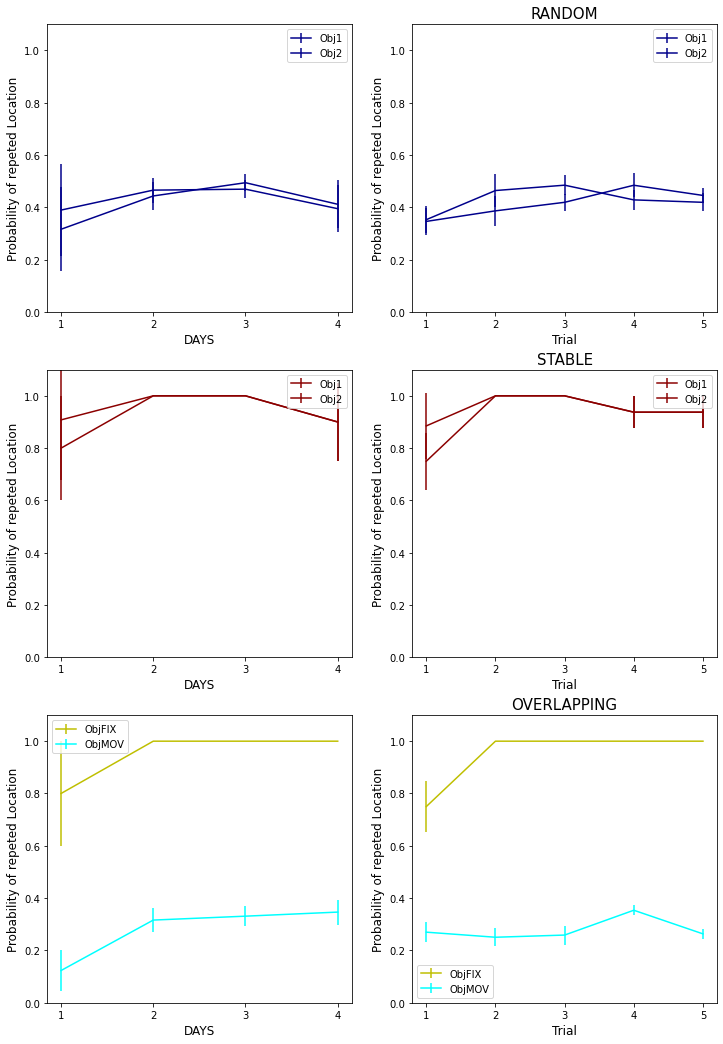

In [182]:
figure, axes = plt.subplots(3,2)
color_random = ['darkblue','darkblue']
color_stable = ['darkred','darkred']
color_overlapping = ['y','cyan']

trials = np.arange(0,5)
for i in range(2):
    axes[0,1].errorbar(trials,np.nanmean(prob_trial_random[i],axis = 0),np.nanstd(prob_trial_random[i],axis = 0)/np.sqrt(prob_trial_random[i].shape[0]),color = color_random[i])
    axes[1,1].errorbar(trials,np.nanmean(prob_trial_stable[i],axis = 0),np.nanstd(prob_trial_stable[i],axis = 0)/np.sqrt(prob_trial_stable[i].shape[0]),color = color_stable[i])
    axes[2,1].errorbar(trials,np.nanmean(prob_trial_overlapping[i],axis = 0),np.nanstd(prob_trial_overlapping[i],axis = 0)/np.sqrt(prob_trial_overlapping[i].shape[0]), color = color_overlapping[i])
 
days = np.arange(0,4)
for i in range(2):
    axes[0,0].errorbar(days,np.nanmean(prob_day_random[i],axis = 1),np.nanstd(prob_day_random[i],axis = 1)/np.sqrt(prob_day_random[i].shape[0]),color = color_random[i])
    axes[1,0].errorbar(days,np.nanmean(prob_day_stable[i],axis= 1),np.nanstd(prob_day_stable[i],axis = 1)/np.sqrt(prob_day_stable[i].shape[0]),color = color_stable[i])
    axes[2,0].errorbar(days,np.nanmean(prob_day_overlapping[i],axis = 1),np.nanstd(prob_day_overlapping[i],axis = 1)/np.sqrt(prob_day_overlapping[i].shape[0]),color = color_overlapping[i])

for i in range(2):
    for j in range(3):
        axes[j,i].set_ylim([0,1.1])
        
trials_comparison_pos = [0,1,2,3,4]
tick_label = ['1','2','3','4','5']

titles = ['RANDOM','STABLE','OVERLAPPING']
for j in range(3):
    axes[j,1].set_xticks(trials_comparison_pos)
    axes[j,1].set_xlabel('Trial', fontsize = 12)
    axes[j,1].set_ylabel('Probability of repeted Location', fontsize = 12)
    axes[j,1].set_title(titles[j],fontsize = 15)
    axes[j,1].set_xticklabels(tick_label)

trials_comparison_pos = [0,1,2,3]
tick_label = ['1','2','3','4']
for j in range(3):
    axes[j,0].set_xticks(trials_comparison_pos)
    axes[j,0].set_xlabel('DAYS', fontsize = 12)
    axes[j,0].set_ylabel('Probability of repeted Location', fontsize = 12)
    axes[j,0].set_xticklabels(tick_label)

for i in range(2):
    axes[0,i].legend(['Obj1','Obj2'])
    axes[1,i].legend(['Obj1','Obj2'])
    axes[2,i].legend(['ObjFIX','ObjMOV'])

figure.set_size_inches([12,18])

figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'probability_trials_days.png')